### A
### 1)
     Can future revenue be predicted accurately using an ARIMA model and two years of training data.

 ### 2)
     The goals of the the time series analysis is to produce a forecast of of the company's revenue for the upcoming year using ARIMA time series analysis.

### B

 ### 1)
     One assumption of a time series model is stationarity of data. In time series analysis, the assumption of stationary data refers to the idea that the statistical properties of a time series do not change over time. More specifically, a stationary time series is one in which the mean, variance, and autocorrelation structure are constant over time. (Wormuth, 2023)

    A second assumption of a time series model is that the residual errors should not be autocorrelated. The term autocorrelation refers to the degree of similarity between A) a given time series, and B) a lagged version of itself, over C) successive time intervals. In other words, autocorrelation is intended to measure the relationship between a variable’s present value and any past values that you may have access to. (InfluxDB: Open Source Time Series Database | InfluxData, 2021)

     

### C
### 1)
    Provide a line graph visualizing the realization of the time series.

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


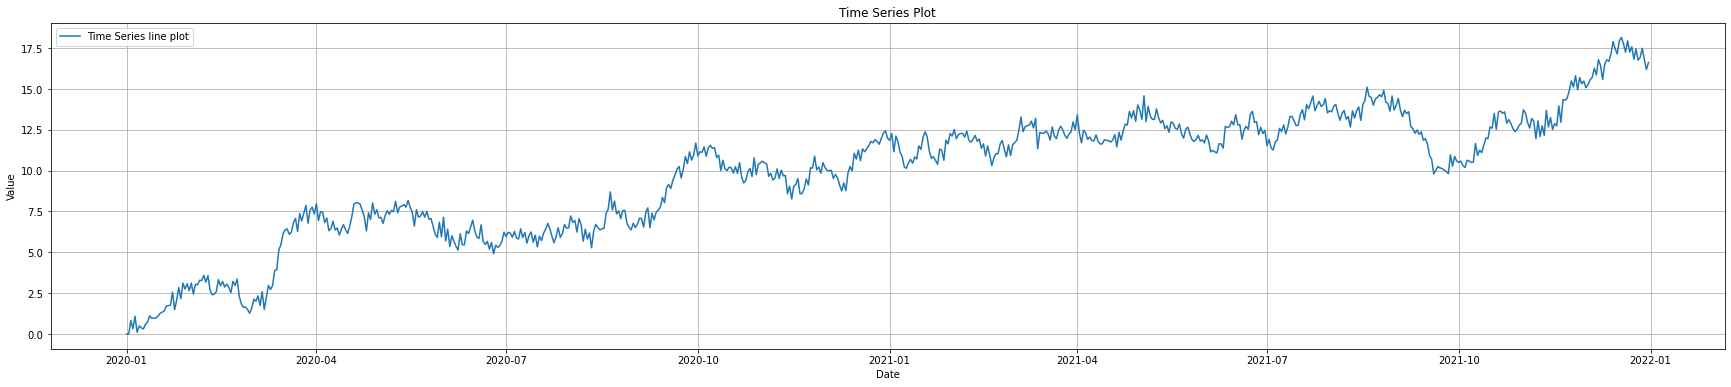

             Revenue
Date                
2020-01-01  0.000000
2020-01-02  0.000793
2020-01-03  0.825542
2020-01-04  0.320332
2020-01-05  1.082554


In [1]:
#import libraries and read in the data from file.
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = '/home/dj/skewl/D213/1/teleco_time_series.csv'
pd.set_option('display.max_columns', None)
# Read the data from the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Create a date range.
date_rng = pd.date_range(start='2020-01-01',  periods=len(df), freq='D')
#set the index of the dataframe to be the date range
df = df.set_index(date_rng)
#remove old index
del df['Day']
df.index.name = 'Date'
# Plot the time series
plt.figure(figsize=(30, 6))
plt.plot(df, label='Time Series line plot')
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
print(df.head())

### 2)
      The time step formatting of the realization is a date range with a daily frequency. There does not appear to be any gaps in measurement. The length of the sequence is 731 days.


### 3) Evaluate stationarity with ADF test.

In [2]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(df)

print("ADF Test Result:")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.3f}')

ADF Test Result:
ADF Statistic: -1.924612157310181
p-value: 0.3205728150793977
Critical Values:
   1%: -3.439
   5%: -2.866
   10%: -2.569


    The P value of 0.32057 indicates non-stationarity.

### 4)
    Drop any duplicate rows. Check for missing values and handle them if necessary.

In [3]:
# Find duplicate rows 
duplicate_rows = df.duplicated().sum()

# Print duplicate rows   # found NO duplicate rows here!
print(duplicate_rows)

0


    Identify missing values.

In [4]:
# Identify missing values using isna() method
missing_values = df.isna().sum()
# Print DataFrame with True for missing values and False for non-missing values
print(missing_values)

# no missing values here!

Revenue    0
dtype: int64


    Diff non stationary data and test for stationarity again with ADF test.

In [5]:
# diff data to create stationary time series and drop any missing values from diff operation
original_df = df
df = df.diff().dropna()
 
# Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(df)

print("ADF Test Result:")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.3f}')
    

ADF Test Result:
ADF Statistic: -44.874527193875984
p-value: 0.0
Critical Values:
   1%: -3.439
   5%: -2.866
   10%: -2.569


    ADF test shows that diffed data is now stationary.

    Split time series data into training and test sets with an 80/20 ratio.

In [6]:
# Define the split ratio
split_ratio = 0.8  # 80% training, 20% testing

# Calculate the split index
split_index = int(len(df) * split_ratio)

# Create training and testing sets non diffed
train_set_diffed = df[:split_index]
test_set_diffed = df[split_index:]
# Create training and testing sets diffed
train_set = original_df[:split_index]
test_set = original_df[split_index:]
#print cleaned data to file
train_set_diffed.to_csv('train_set_diffed.csv')
test_set_diffed.to_csv('test_set_diffed.csv')

### D
### 1)
### Report the annotated findings with visualizations of your data analysis.

### Seasonality
    From the seasonality plot below we can see that there is a weak seasonal component to the diffed time series data. There is a repeating patttern but the seasonality is weak because the magnitude of the y axis is smaller than that of the plots of the trend and residuals.

### Lack of trends in trend component.
    From the trend component plot below we can see that there is a flat line indicating a lack of a trend in the diffed time series data. The results of the ADF test applied to the trend component suggest that the trend component is stationary. p-value: 3.747179214113898e-09    

### Lack of trends in residual component.
    From the residual plot we can see a lack of trends in the data indicated by a lack of a slope. The residual points are randomly scattered around the horizontal line at Y=0 also indicating a lack of trends. There is also a consistent spread of the residual points across the range of observed values indicating there is no widening or narrowing of patterns. The ADF test indicates a lack of trend with a p-value: 1.555442429275896e-22. The final data confirming lack of trends in the residual component is the mean of the residuals which is 0.0008308085590907051. This is close to 0 confirming a lack of trend in the residual component.

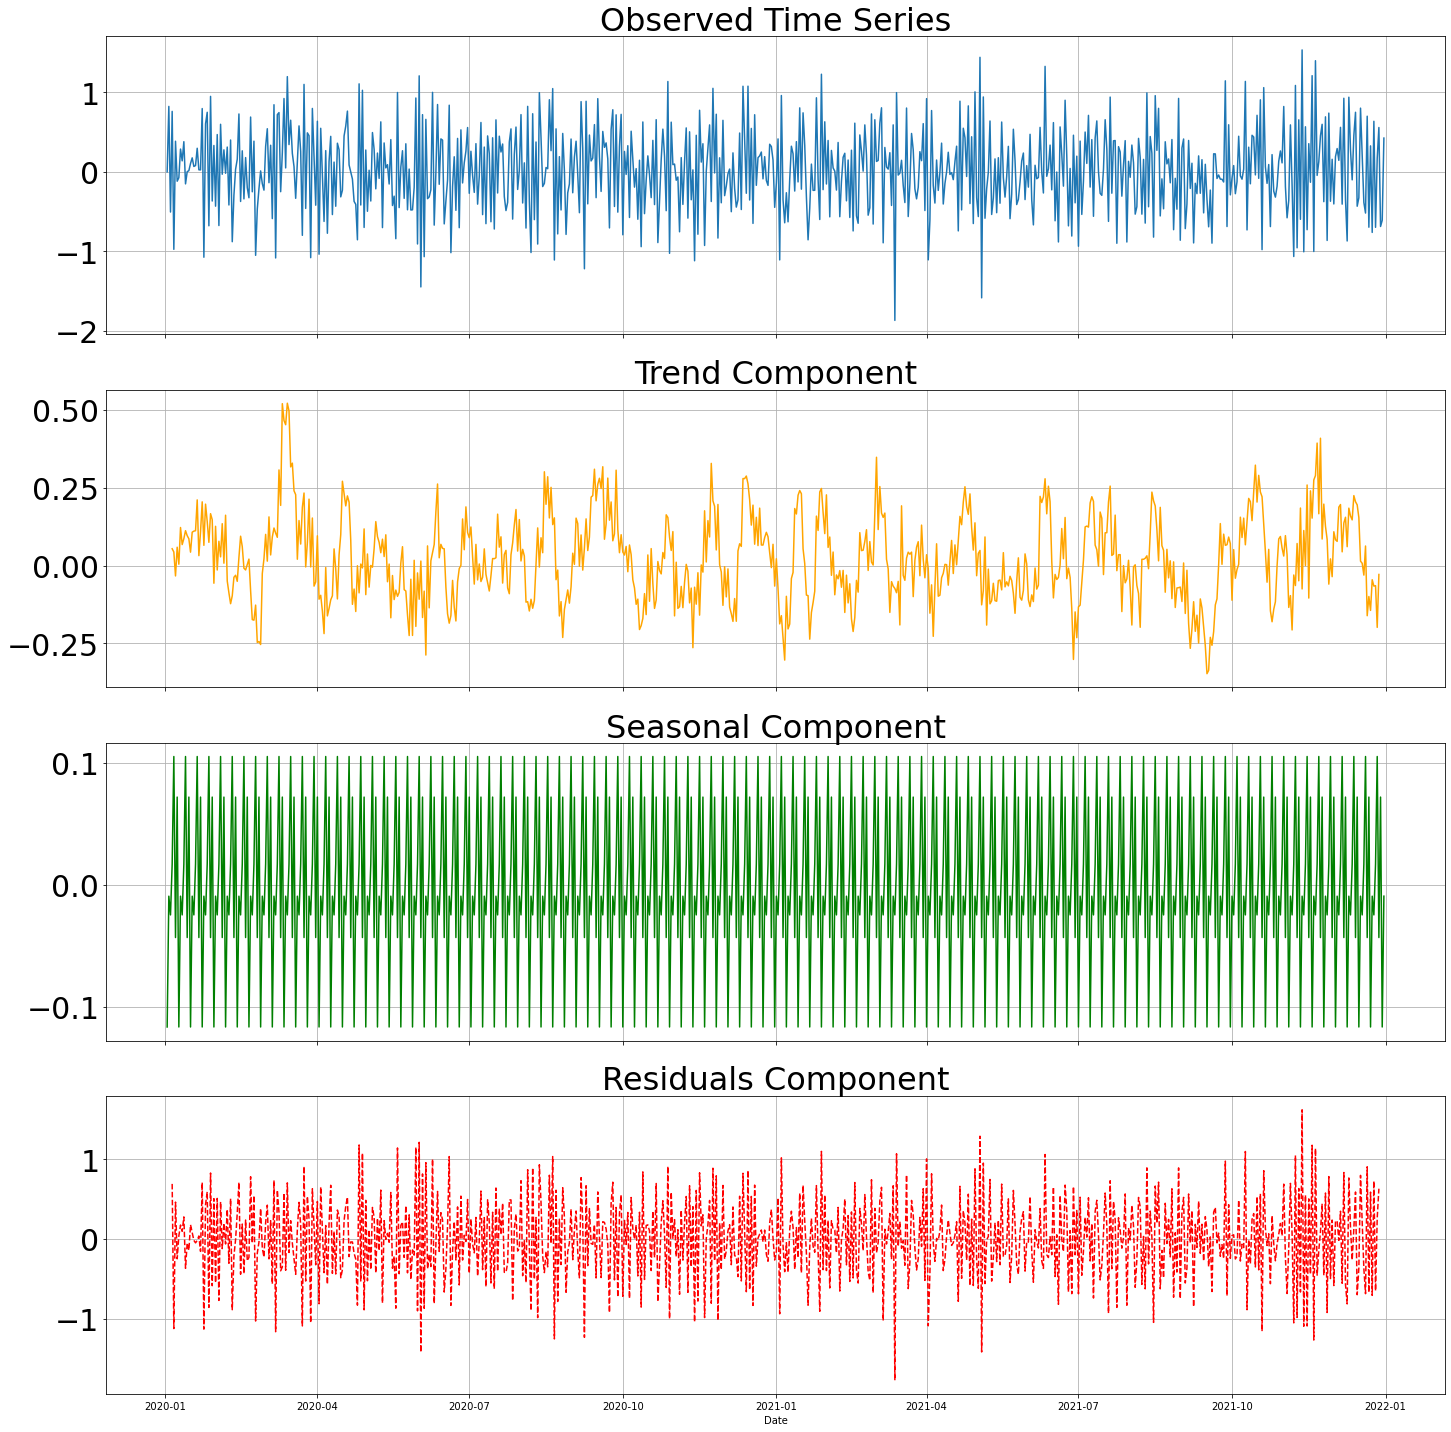

Mean of residuals: 0.0008308085590907051
ADF test for trend component: -6.707767592249574
ADF Statistic: -6.707767592249574
p-value: 3.747179214113898e-09
ADF test for residual component: -12.152915324878496
ADF Statistic: -12.152915324878496
p-value: 1.555442429275896e-22


In [7]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from scipy.signal import periodogram
import matplotlib as mpl

# make plots bigger
plt.rcParams['figure.figsize'] = [10, 10]
# Decompose the time series using an additive model
decomposition = seasonal_decompose(df, model='additive')

# Create a custom decomposition plot with labels
fig, axes = plt.subplots(4, 1, figsize=(20, 20), sharex=True)  # Create subplots with shared x-axis
# Plot the observed component
axes[0].plot(decomposition.observed, label='Observed')
axes[0].set_title("Observed Time Series",fontsize=32)
axes[0].grid(True)
axes[0].tick_params(axis='y', labelsize=30)
# Plot the trend component
axes[1].plot(decomposition.trend, label='Trend', color='orange')
axes[1].set_title("Trend Component",fontsize=32)
axes[1].grid(True)
axes[1].tick_params(axis='y', labelsize=30)
# Plot the seasonal component
axes[2].plot(decomposition.seasonal, label='Seasonal', color='green')
axes[2].set_title("Seasonal Component",fontsize=32)
axes[2].grid(True)
axes[2].tick_params(axis='y', labelsize=30)
# Plot the residual component
axes[3].plot(decomposition.resid, label='Residuals', color='red', linestyle='--')
axes[3].set_title("Residuals Component",fontsize=32)
axes[3].grid(True)
axes[3].tick_params(axis='y', labelsize=30)

# Common x-axis label
axes[3].set_xlabel("Date")
# Set global font properties

plt.tight_layout()  # Adjust subplot spacing for better visualization
plt.show()
## confirm lack of trend in residuals
print("Mean of residuals:", decomposition.resid.mean())

# Perform ADF test on the trend component
adf_result = adfuller(decomposition.trend.dropna())
print('ADF test for trend component:', adf_result[0])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


# Perform ADF test on the residuals component
adf_result = adfuller(decomposition.resid.dropna())
print('ADF test for residual component:', adf_result[0])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

### Autocorrelation of non diffed data.
    The autocorrelation function shows that the original data is not stationary because the plot shows a trend line and the coefficients do not return to zero. 

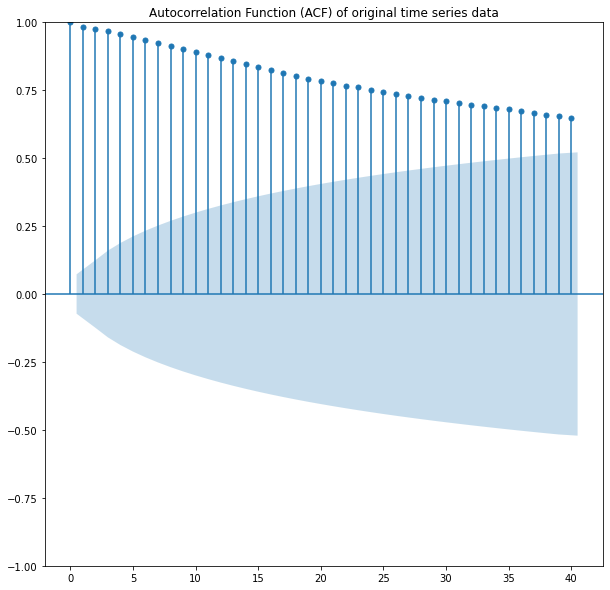

In [8]:
# Plot the Autocorrelation Function (ACF)
plot_acf(original_df, lags=40)  # Plot ACF for 40 lags
plt.title("Autocorrelation Function (ACF) of original time series data")
plt.show()

### Autocorrelation of diffed data.
    The autocorrelation function shows that the diffed data is stationary because the correlation coefficient quickly centers around zero.

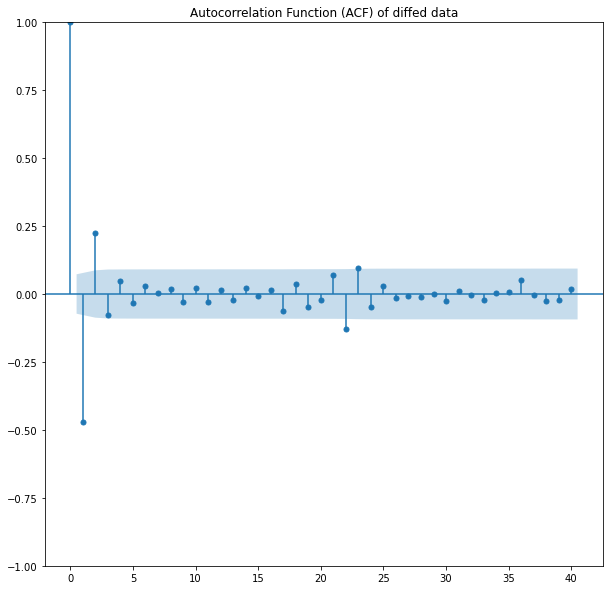

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot the Autocorrelation Function (ACF)
plot_acf(df, lags=40)  # Plot ACF for 40 lags
plt.title("Autocorrelation Function (ACF) of diffed data")
plt.show()



### PACF plot of diffed data

Indicates stationarity of data.

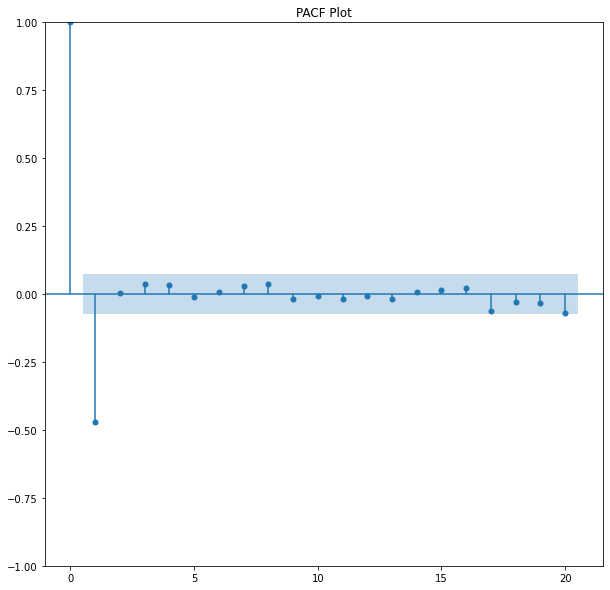

In [10]:
from statsmodels.graphics.tsaplots import  plot_pacf

# Plot the ACF and PACF
plot_pacf(df.dropna(), lags=20)
plt.title("PACF Plot")
plt.show()

### Spectral Density

    The plot of spectral density shows that the diffed data does have a seasonal component which appears to repeat at a frequency of approximately 0.48. The periodicity of the largest peak is approximately 1/0.48 or 2.0833 days.

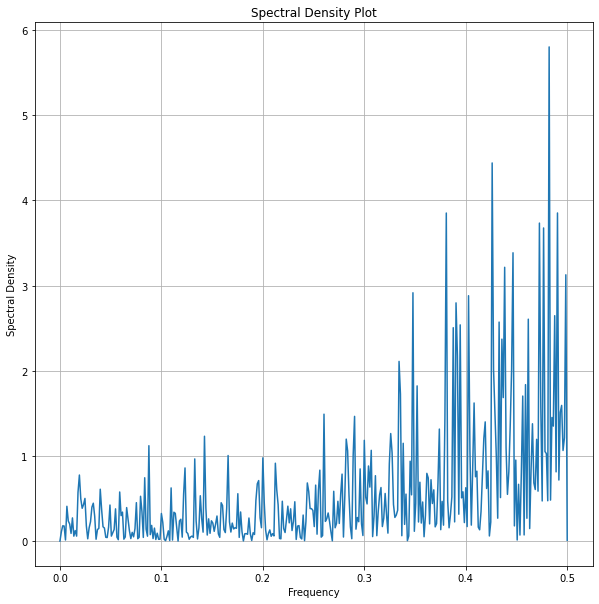

In [11]:
# Calculate and plot the spectral density
frequencies, spectral_density = periodogram(df['Revenue'])

plt.plot(frequencies, spectral_density)
plt.title("Spectral Density Plot")
plt.xlabel("Frequency")
plt.ylabel("Spectral Density")
plt.grid(True)
plt.show()


### 2) Use auto_arima to idendify the best ARIMA model.


In [12]:
import pmdarima as pm

# Perform a grid search to find the best ARIMA model
model = pm.auto_arima(
    train_set,
    seasonal=True,  # Set to True if seasonality is detected
    stepwise=True,  # Use stepwise search to find the best model
    suppress_warnings=True,
    error_action="ignore",
    max_order=10,  # Limit on p + d + q to avoid excessive computation
)

# Get the optimal ARIMA order
print("Best ARIMA Order:", model.order)

Best ARIMA Order: (1, 1, 0)


In [13]:
from statsmodels.tsa.arima.model import ARIMA


# Fit the ARIMA model
arima_order = (1,1 , 0)  
arima_model = ARIMA(train_set, order=arima_order)
arima_fit = arima_model.fit()

# Summary of the fitted model
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -385.018
Date:                Wed, 15 May 2024   AIC                            774.035
Time:                        21:22:18   BIC                            782.772
Sample:                    01-01-2020   HQIC                           777.441
                         - 08-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4578      0.036    -12.618      0.000      -0.529      -0.387
sigma2         0.2193      0.014     15.954      0.000       0.192       0.246
Ljung-Box (L1) (Q):                   0.01   Jarque-

### 3) Perform forecast.

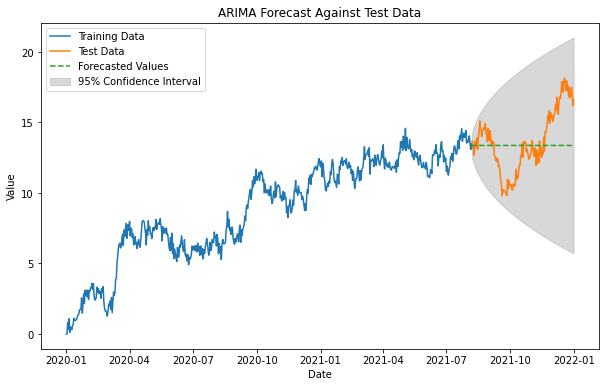

In [14]:
# Generate forecasts for the next 146 days
n_forecast_periods = 147
forecast = arima_fit.forecast(steps=n_forecast_periods)

# Get confidence intervals for the forecasts
forecast_ci = arima_fit.get_forecast(steps=n_forecast_periods).conf_int()


# Plot the training data, test data, and forecasts with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train_set, label="Training Data")
plt.plot(test_set, label="Test Data")
plt.plot(forecast.index, forecast, label="Forecasted Values", linestyle='--')
plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3, label="95% Confidence Interval")
plt.title("ARIMA Forecast Against Test Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### 4)Ssee above for output and calculations.

### 5) See above for code used to support the implementation of the time series model.

### E
### 1)
    I chose to use the pmdarima auto_arima() function to perform a grid search that provided me with the best ARIMA model for my data set. The algorithm decided an ARIMA model with one autoregressive term, one order of differencing, and no moving average would be the best fit. The AIC of this model is 774.

    The prediction interval of the forecast based on the graph of the confidence interval is approximately  6 million to  20 million dollars. The prediction interval is a range of values within which future observations are expected to fall with a certain level of confidence. 95% in this case.

    I chose a forecast length of 146 days to match the percentage of test data so the accuracy of the model could be evaluated.

    The metrics I used for evaluation are mean absolute error, mean squared error, and root mean squared error. These are evaluated by calculating the predicted values against the test values. See the output below for the results.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test_set, forecast)
mse = mean_squared_error(test_set, forecast)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.738607878329873
Mean Squared Error (MSE): 4.737181349875626
Root Mean Squared Error (RMSE): 2.1765066850059585


### 2) visualization of the forecast of the final model compared to the test set.

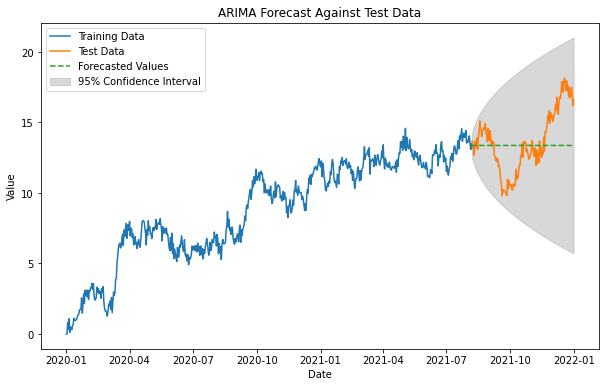

In [16]:
# Generate forecasts for the next 147 days
n_forecast_periods = 147
forecast = arima_fit.forecast(steps=n_forecast_periods)

# Get confidence intervals for the forecasts
forecast_ci = arima_fit.get_forecast(steps=n_forecast_periods).conf_int()


# Plot the training data, test data, and forecasts with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train_set, label="Training Data")
plt.plot(test_set, label="Test Data")
plt.plot(forecast.index, forecast, label="Forecasted Values", linestyle='--')
plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3, label="95% Confidence Interval")
plt.title("ARIMA Forecast Against Test Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### 3)

    A recommended course of action based on the results is that the company can use this model to predict expected revenue for approximately 150 days into the future. This confidence in the model is based on the accuracy measurements that were calculated from the test data. When more data is collected the model can be fit again and the accuracy tested against a larger data set. When this is done revenue predictions can be utilized with greater accuracy for much longer into the future. These predictions can help executives in their fiscal planning, and budgets.



### Citations

Wormuth, B. (2023, March 9). The Stationary Data Assumption in Time Series Analysis. Statistics Solutions. https://www.statisticssolutions.com/stationary-data-assumption-in-time-series-analysis/


InfluxDB: Open Source Time Series Database | InfluxData. (2021, December 10). InfluxData. https://www.influxdata.com/blog/autocorrelation-in-time-series-data/